In [1]:
import numpy as np
import pandas as pd 
from keras.preprocessing.image import ImageDataGenerator, load_img
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import random
import warnings
import os

warnings.filterwarnings('ignore')
print(os.listdir("Data/"))
FAST_RUN = False
IMAGE_WIDTH=64
IMAGE_HEIGHT=64
IMAGE_SIZE=(IMAGE_WIDTH, IMAGE_HEIGHT)
IMAGE_CHANNELS=3

Using TensorFlow backend.


['sampleSubmission.csv', 'test1', 'train']


In [2]:
filenames = os.listdir("Data/train")
categories = []
for filename in filenames:
    category = filename.split('.')[0]
    if category == 'dog':
        categories.append(1)
    else:
        categories.append(0)

In [3]:
df = pd.DataFrame({
    'filename': filenames,
    'category': categories
})


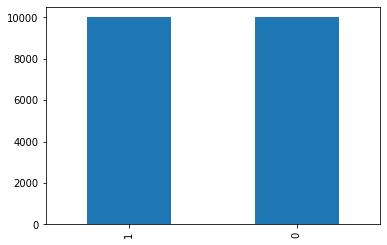

In [4]:
df['category'].value_counts().plot.bar()

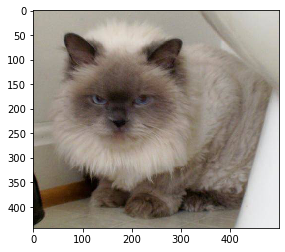

In [5]:
rastgeleOrnek = random.choice(filenames)
image = load_img("Data/train/"+rastgeleOrnek)
plt.imshow(image)

In [6]:
df['category'] = df['category'].replace({0: 'cat', 1: 'dog'}) 
df['category']

0        cat
1        cat
2        cat
3        cat
4        cat
        ... 
19995    dog
19996    dog
19997    dog
19998    dog
19999    dog
Name: category, Length: 20000, dtype: object

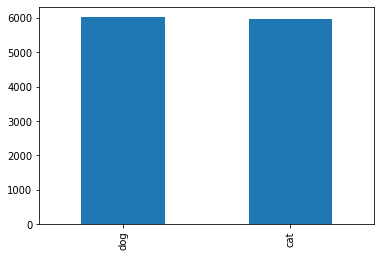

In [7]:
train_df, validate_df = train_test_split(df, test_size=0.40, random_state=42)
train_df['category'].value_counts().plot.bar()

In [21]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Activation, BatchNormalization

model = Sequential()

model.add(Conv2D(64, (3, 3), activation='relu',use_bias=True, input_shape=(IMAGE_WIDTH, IMAGE_HEIGHT, IMAGE_CHANNELS)))
model.add(MaxPooling2D(pool_size=(2, 2)))

#fully connected işlemi, 2 hidden layers
model.add(Flatten())
model.add(Dense(128, activation = 'relu',use_bias=True))
model.add(Dense(2, activation = 'relu',use_bias=True))

model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 62, 62, 64)        1792      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 31, 31, 64)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 61504)             0         
_________________________________________________________________
dense_3 (Dense)              (None, 128)               7872640   
_________________________________________________________________
dense_4 (Dense)              (None, 2)                 258       
Total params: 7,874,690
Trainable params: 7,874,690
Non-trainable params: 0
_________________________________________________________________


In [9]:
df['category'] = df['category'].replace({0: 'cat', 1: 'dog'}) 
df['category']

0        cat
1        cat
2        cat
3        cat
4        cat
        ... 
19995    dog
19996    dog
19997    dog
19998    dog
19999    dog
Name: category, Length: 20000, dtype: object

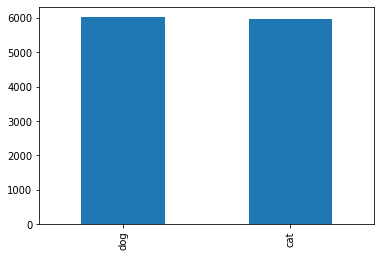

In [10]:
train_df, test_df = train_test_split(df, test_size=0.40, random_state=42)
train_df['category'].value_counts().plot.bar()

In [13]:
total_train = train_df.shape[0]
total_train


12000

In [14]:
total_test = test_df.shape[0]
total_test

8000

In [16]:
batch_size=100

In [17]:
#Data augmentation
train_datagen = ImageDataGenerator(
    rotation_range=15,
    rescale=1./255,
    shear_range=0.1,
    zoom_range=0.2,
    horizontal_flip=True,
    width_shift_range=0.1,
    height_shift_range=0.1
)
#Data augmentation
train_generator = train_datagen.flow_from_dataframe(
    train_df, 
    "Data/train/",
    x_col='filename',
    y_col='category',
    target_size=IMAGE_SIZE,
    class_mode='categorical',
    batch_size=batch_size
)

validation_datagen = ImageDataGenerator(rescale=1./255)
validation_generator = validation_datagen.flow_from_dataframe(
    validate_df, 
    "Data/train/", 
    x_col='filename',
    y_col='category',
    target_size=IMAGE_SIZE,
    class_mode='categorical',
    batch_size=batch_size
)

example_df = train_df.sample(n=1).reset_index(drop=True)
example_generator = train_datagen.flow_from_dataframe(   #data augmentation işlemi, gerçek veriye benzeyen imageler üretilir
    example_df,   #zoom, zoomin,zoomout resmin farklı yerine koyma, döndürme, sola sağa yatırma
    "Data/train/", 
    x_col='filename',
    y_col='category',
    target_size=IMAGE_SIZE,
    class_mode='categorical'
)

Found 12000 validated image filenames belonging to 2 classes.
Found 8000 validated image filenames belonging to 2 classes.
Found 1 validated image filenames belonging to 1 classes.


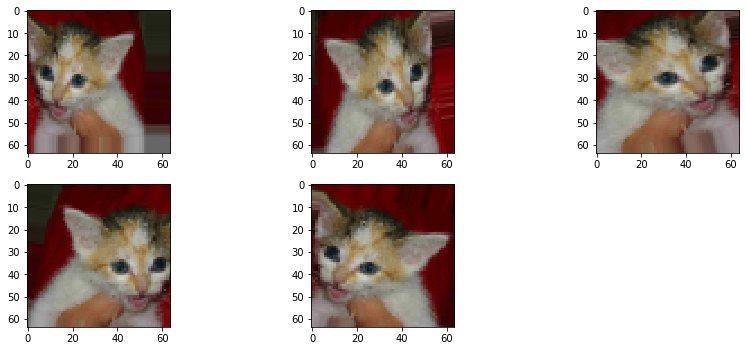

In [18]:
plt.figure(figsize=(12, 12))
for i in range(0, 5):
    plt.subplot(5, 3, i+1)
    for X_batch, Y_batch in example_generator:
        image = X_batch[0]
        plt.imshow(image)
        break
plt.tight_layout()
plt.show()